# ECB Open Data Portal: Example Request

### Step 1: Import Package, define paramters and make request

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

# Define parameters and API URL:
base_url = "https://data-api.ecb.europa.eu/service/data"
flow_ref = "EXR"                 # exchange rates dataflow
series_key = "D.USD.EUR.SP00.A"  # Daily USD/EUR exchange rates
start_period = "2023-01-01"
end_period = "2023-12-31"
url = f"{base_url}/{flow_ref}/{series_key}?startPeriod={start_period}&endPeriod={end_period}&format=jsondata"  # full URL with parameters

# Fetch the data:
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    print("Data retrieved successfully.")
else:
    print(f"Failed to fetch data. Status Code: {response.status_code}")
    print(response.text)
    raise SystemExit("Exiting script due to error.")

data

Data retrieved successfully.


{'header': {'id': '0f2ad931-a51c-4902-b2e5-8b799b9116f5',
  'test': False,
  'prepared': '2024-12-09T06:28:21.288+01:00',
  'sender': {'id': 'ECB'}},
 'dataSets': [{'action': 'Replace',
   'validFrom': '2024-12-09T06:28:21.288+01:00',
   'series': {'0:0:0:0:0': {'attributes': [0,
      None,
      0,
      None,
      None,
      None,
      None,
      None,
      None,
      None,
      None,
      None,
      0,
      None,
      0,
      None,
      0,
      0,
      0,
      0],
     'observations': {'0': [1.0683, 0, 0, None, None],
      '1': [1.0545, 0, 0, None, None],
      '2': [1.0599, 0, 0, None, None],
      '3': [1.0601, 0, 0, None, None],
      '4': [1.05, 0, 0, None, None],
      '5': [1.0696, 0, 0, None, None],
      '6': [1.0723, 0, 0, None, None],
      '7': [1.0747, 0, 0, None, None],
      '8': [1.0772, 0, 0, None, None],
      '9': [1.0814, 0, 0, None, None],
      '10': [1.0812, 0, 0, None, None],
      '11': [1.0843, 0, 0, None, None],
      '12': [1.0839, 0, 0, 

### Step 2: Extract relevant data

In [2]:
# Extract series data and observations:
series_data = data['dataSets'][0]['series']
structure = data['structure']
time_periods = structure['dimensions']['observation'][0]['values']  # extract time values

observations = []  # lists for observations
dates = []         # list for dates

for series_key, series_content in series_data.items():
    series_observations = series_content['observations']
    for obs_key, obs_values in series_observations.items():
        date_index = int(obs_key)              # use obs_key as index into time_periods
        date = time_periods[date_index]['id']  # map index to actual date
        value = obs_values[0]                  # first element in the observation array
        if value is not None:
            dates.append(date)
            observations.append(value)

df = pd.DataFrame({'Date': pd.to_datetime(dates), 'Exchange Rate': observations})
df.head(5)

,Date,Exchange Rate
0,2023-01-02,1.0683
1,2023-01-03,1.0545
2,2023-01-04,1.0599
3,2023-01-05,1.0601
4,2023-01-06,1.0500


### Step 3: Plot a time series  

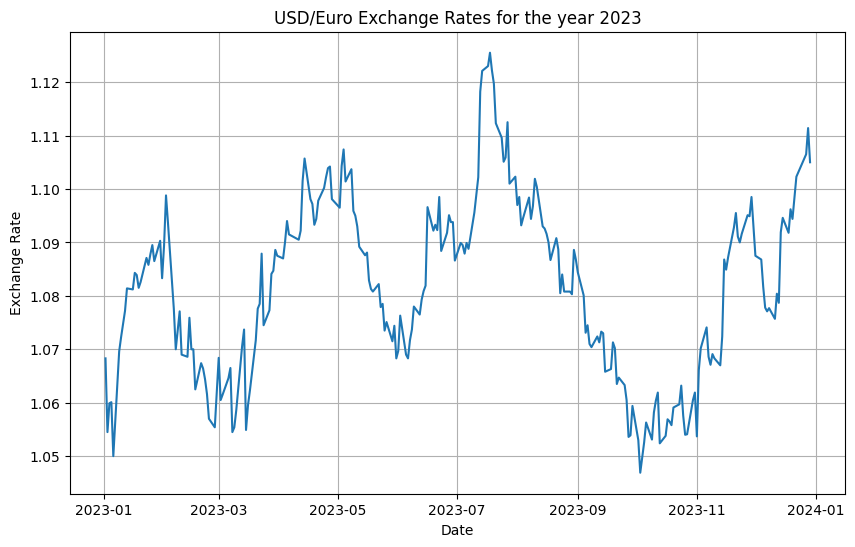

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Exchange Rate'])
plt.title("USD/Euro Exchange Rates for the year 2023")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.grid(True)
plt.show()